<a href="https://colab.research.google.com/github/GrishkaYesenin/Medical-Image-Detection-ML/blob/main/Main_Improved_YOLOv8_Algorithm_for_Detecting_Bone_Marrow_Cells.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the TensorBoard notebook extension
# %load_ext tensorboard

### Show data

https://huggingface.co/datasets/keremberke/blood-cell-object-detection

**Number of Images**

'train': 255, 'test': 36, 'validation': 73

**Dataset Labels**
['platelets', 'rbc', 'wbc']

In [ ]:
# example

{'image_id': 148,
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=416x416>,
 'width': 416,
 'height': 416,
 'objects': {'id': [1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995],
  'area': [4588, 7735, 6498, 4693, 9082, 3444, 8917, 3111, 955],
  'bbox': [[1.0, 142.0, 57.0, 80.5],
   [30.0, 58.0, 81.0, 95.5],
   [188.0, 76.0, 69.5, 93.5],
   [232.0, 160.0, 63.0, 74.5],
   [63.0, 278.0, 86.5, 105.0],
   [9.0, 281.0, 56.0, 61.5],
   [142.0, 157.0, 74.0, 120.5],
   [69.0, 204.0, 49.0, 63.5],
   [33.0, 30.0, 24.5, 39.0]],
  'category': [1, 1, 1, 1, 1, 1, 2, 0, 0]}}

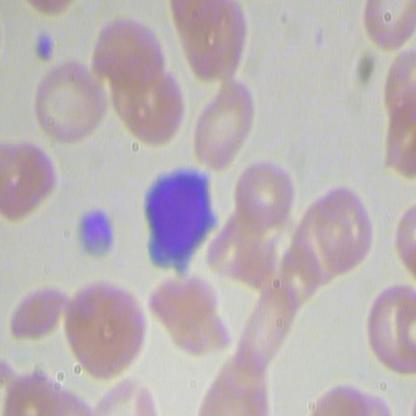

In [ ]:
# example["image"]

In [ ]:
# ds["train"]

Dataset({
    features: ['image_id', 'image', 'width', 'height', 'objects'],
    num_rows: 255
})

### Install YOLO8

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 524, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'predict', 'export', 'track', 'val', 'train', 'benchmark'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'classify', 'pose', 'obb', 'segment', 'detect'}
                MODE (required) is one of {'predict', 'export', 'track', 'val', 'train', 'benchmark'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

### Install Roboflow

to directly read our training data. For colab, we are going to find a workaround to handle encoding issues by the platform. In fact, we may encounter encoding issues for other tasks in Colab so let's go ahead and run the following cell.

In [ ]:
!pip install roboflow

In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="dLgRCyS3mzG4YTn5JIQF")
project = rf.workspace("team-roboflow").project("blood-cell-detection-1ekwu")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.14, to fix: `pip install ultralytics==8.0.196`


TODO: Open .yaml file to change write way to test train and valid data

### Train the Model



In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=20 imgsz=416

100% 6.23M/6.23M [00:00<00:00, 23.3MB/s]
Ultralytics YOLOv8.2.14 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/fragments/Blood-Cell-Detection-3/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=

In [ ]:
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=600)

FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/train/confusion_matrix.png'

In [ ]:
Image(filename='/content/runs/detect/train/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml epochs=20 imgsz=416

###  Export Custom Trained Ultralytics YOLOv8 Model

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cp /content/runs/detect/train/weights/best.pt /content/gdrive/My\ Drive/yolov8/weights

cp: cannot stat '/content/runs/detect/train/weights/best.pt': No such file or directory


# Predict

 Путь если модель обучается впервые:

In [ ]:
# weights_way = "/content/runs/detect/train/weights/best.pt"

Using Our Uploaded Model Weights:

In [ ]:
import os.path
from os import path

if path.exists('/content/yolov8') == False:
  os.mkdir('/content/yolov8/')
  os.mkdir('/content/yolov8/weights')

os.chdir('/content/yolov8/weights')
!pwd
!ls

/content/yolov8/weights
best.pt


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Copy weights from our Google Drive to a folder called "weights" in our YOLO5 directory.
%cp /content/gdrive/My\ Drive/weights/best.pt /content/yolov8/weights

In [ ]:
# !yolo task=detect mode=predict model=/content/yolov8/weights/best.pt conf=0.5 source={dataset.location}/test/images imgsz=416

In [ ]:
model = YOLO("/content/yolov8/weights/best.pt")
results = model.predict(source=f"{dataset.location}/test/images" ,show=True, imgsz=416, save_txt=True)

# Show results

In [ ]:
import glob
from IPython.display import display, Image

for image_path in glob.glob(f"/content/yolov8/weights/runs/detect/predict/*.jpg"):
  display(Image(filename=image_path, width=600))
  print()

# Prepare custom dataset: split full-size big image into fragments with overlaping

### Shift = MAX_LEN_OF_BOXES = 163

Размер полносвязного изображения должен быть n * 416 - (n - 1) * shift, где n и shift - целые числа \
(416-163)*n + 163 = img_size \
253*n + 163 = img_size \
img_size = {1934, 2187, 2440}


In [ ]:
shift = 163
n = 8
new_size = 2187

### Make fragments and export it to Google Drive


In [ ]:
from PIL import Image
image_path = "/content/full_sized_image"
im1 = Image(image_path)
im3 = im1.resize((new_size, new_size))
im3.show()

In [ ]:
%cp /content/full_sized_image2.jpg /content/gdrive/My\ Drive

cp: cannot stat '/content/full_sized_image2.jpg': No such file or directory


In [ ]:
import os.path
from os import path

if path.exists('/content/fragments/') == False:
  os.mkdir('/content/fragments/')

os.chdir('/content/fragments/')
!pwd
!ls

/content/fragments


In [ ]:
image_path = "/content/fragments/fragment"
x, y = 0, 0
for y in range(0, new_size - 415, 416 - shift):
  for x in range(0, new_size - 415, 416 - shift):
    fragment_im= im.crop((x, y, x + 415, y + 415))
    fragment_im.save(image_path + f"{y}_{x}.jpg")
    print(image_path +f"{y}_{x}.jpg", (x, y, x + 415, y + 415))

/content/fragments/fragment0_0.jpg (0, 0, 415, 415)
/content/fragments/fragment0_253.jpg (253, 0, 668, 415)
/content/fragments/fragment0_506.jpg (506, 0, 921, 415)
/content/fragments/fragment0_759.jpg (759, 0, 1174, 415)
/content/fragments/fragment0_1012.jpg (1012, 0, 1427, 415)
/content/fragments/fragment0_1265.jpg (1265, 0, 1680, 415)
/content/fragments/fragment0_1518.jpg (1518, 0, 1933, 415)
/content/fragments/fragment0_1771.jpg (1771, 0, 2186, 415)
/content/fragments/fragment253_0.jpg (0, 253, 415, 668)
/content/fragments/fragment253_253.jpg (253, 253, 668, 668)
/content/fragments/fragment253_506.jpg (506, 253, 921, 668)
/content/fragments/fragment253_759.jpg (759, 253, 1174, 668)
/content/fragments/fragment253_1012.jpg (1012, 253, 1427, 668)
/content/fragments/fragment253_1265.jpg (1265, 253, 1680, 668)
/content/fragments/fragment253_1518.jpg (1518, 253, 1933, 668)
/content/fragments/fragment253_1771.jpg (1771, 253, 2186, 668)
/content/fragments/fragment506_0.jpg (0, 506, 415, 921

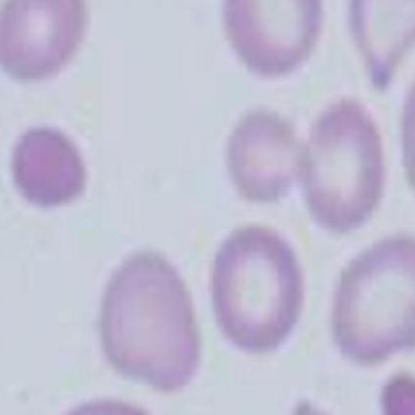

/content/fragments/fragment1771_253.jpg


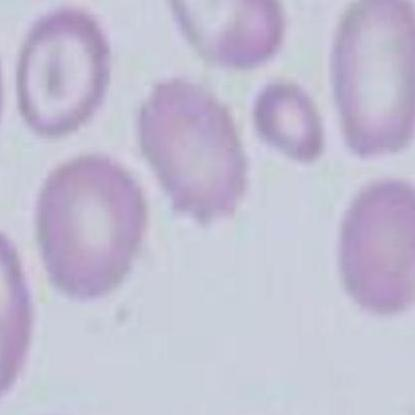

/content/fragments/fragment759_1265.jpg


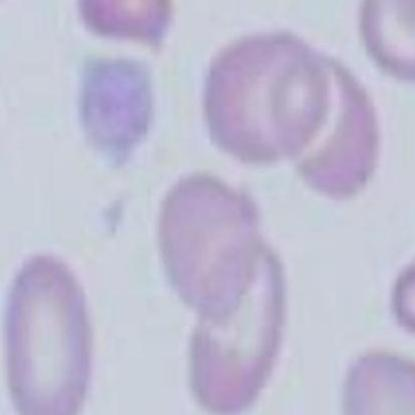

/content/fragments/fragment1518_759.jpg


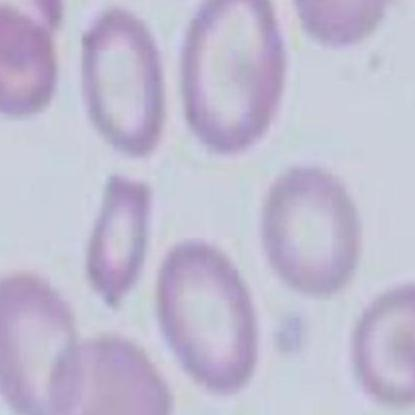

/content/fragments/fragment1012_1012.jpg


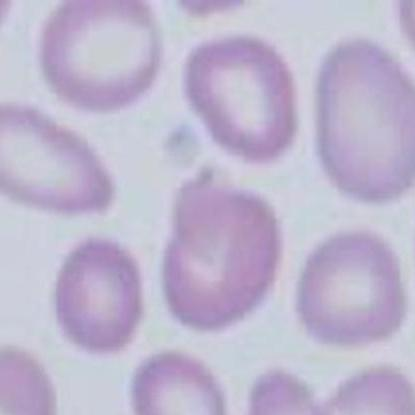

/content/fragments/fragment0_506.jpg


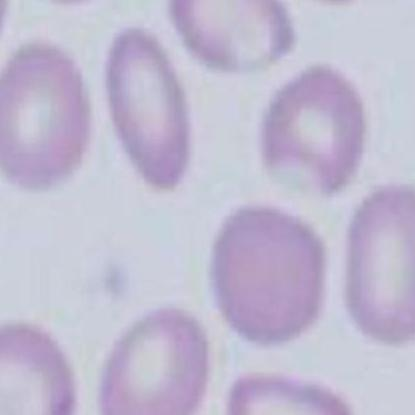

/content/fragments/fragment253_1012.jpg


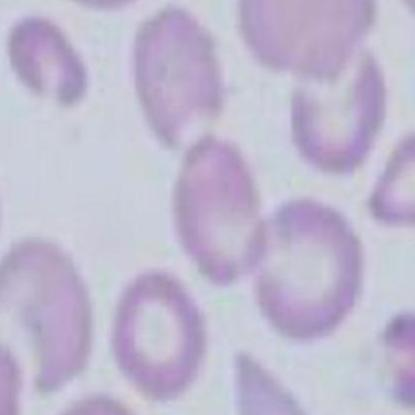

/content/fragments/fragment506_1771.jpg


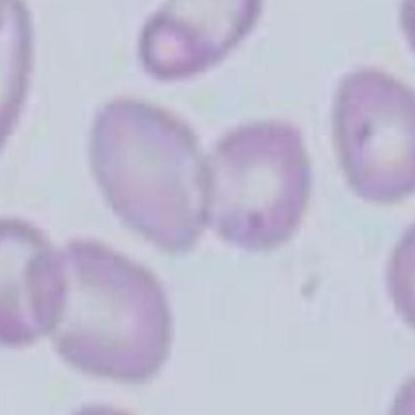

/content/fragments/fragment1771_1012.jpg


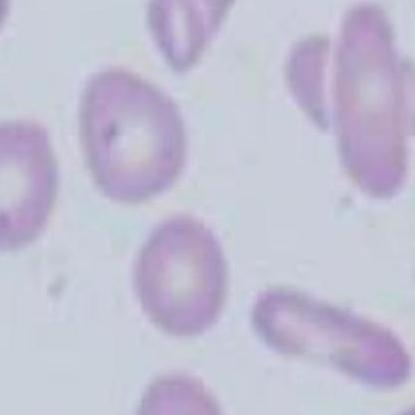

/content/fragments/fragment1771_1265.jpg


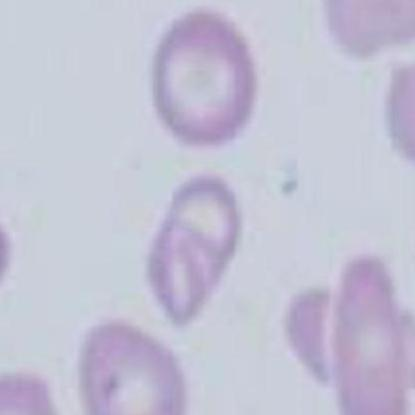

/content/fragments/fragment1518_1265.jpg


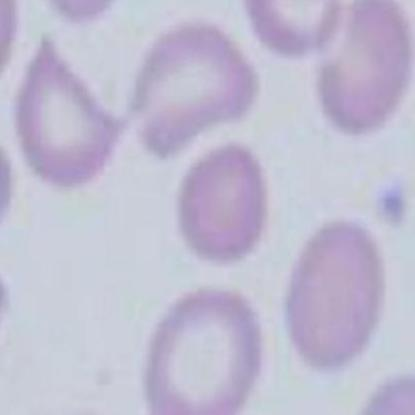

/content/fragments/fragment1771_1771.jpg


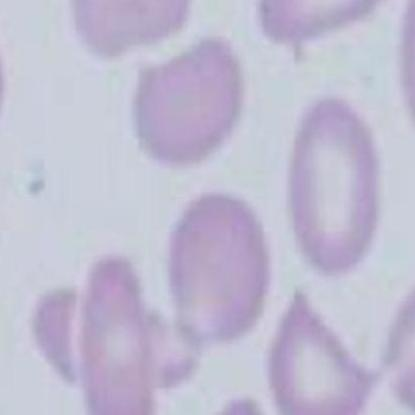

/content/fragments/fragment1518_1518.jpg


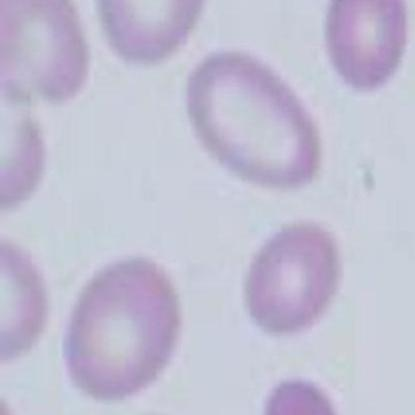

/content/fragments/fragment1518_0.jpg


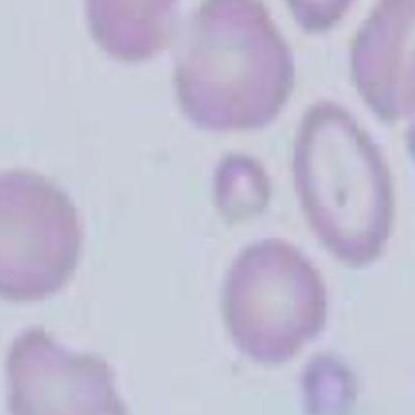

/content/fragments/fragment1012_1518.jpg


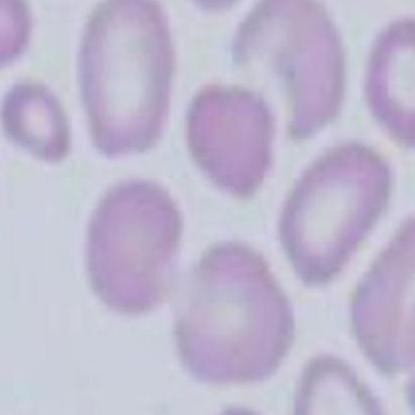

/content/fragments/fragment759_1518.jpg


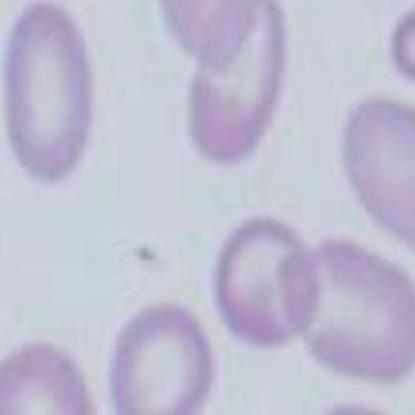

/content/fragments/fragment1771_759.jpg


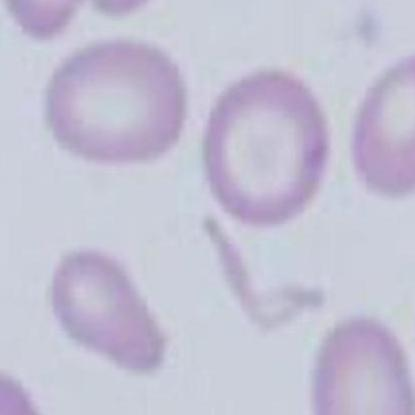

/content/fragments/fragment506_759.jpg


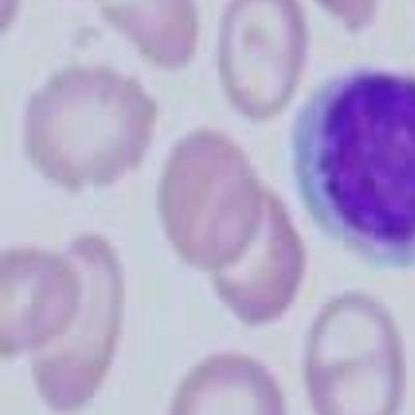

/content/fragments/fragment759_0.jpg


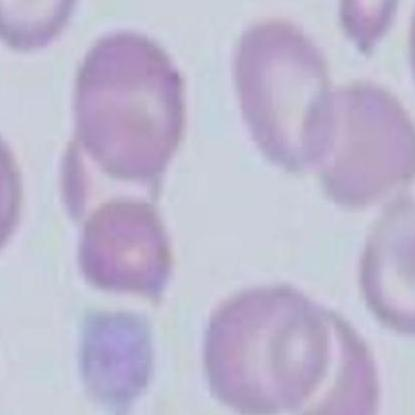

/content/fragments/fragment1265_759.jpg


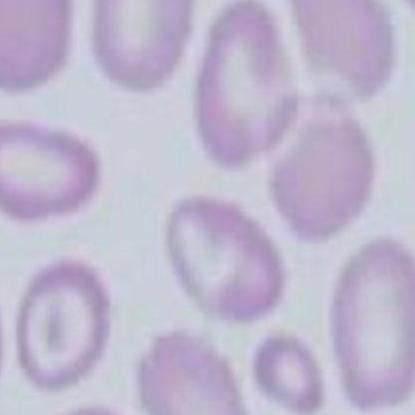

/content/fragments/fragment506_1265.jpg


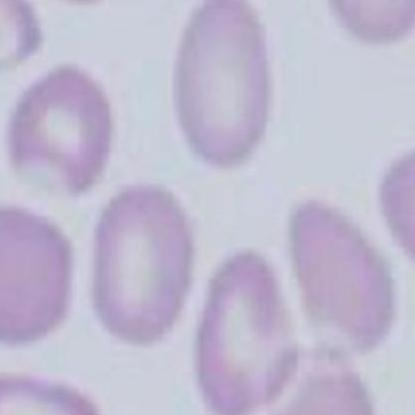

/content/fragments/fragment253_1265.jpg


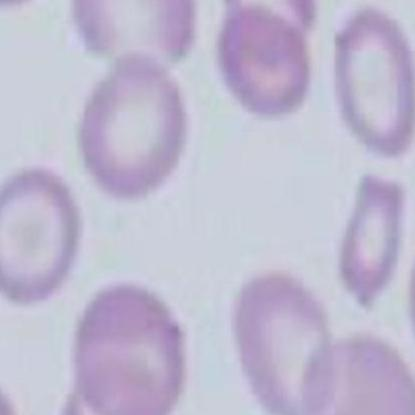

/content/fragments/fragment1012_759.jpg


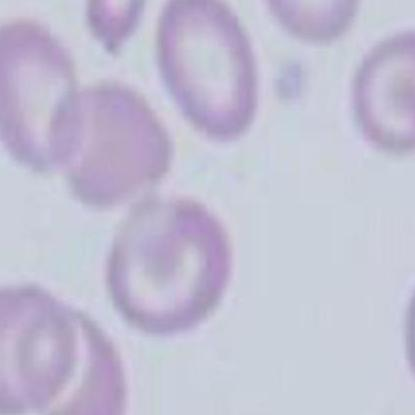

/content/fragments/fragment1265_1012.jpg


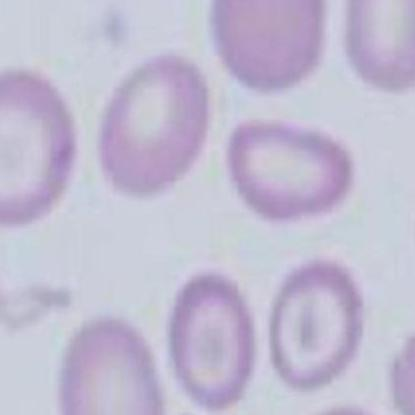

/content/fragments/fragment506_1012.jpg


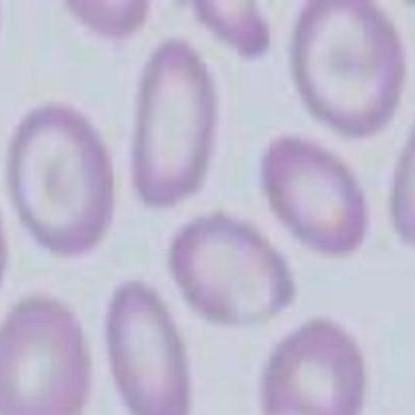

/content/fragments/fragment0_1012.jpg


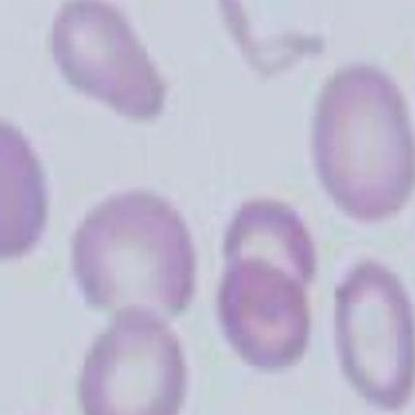

/content/fragments/fragment759_759.jpg


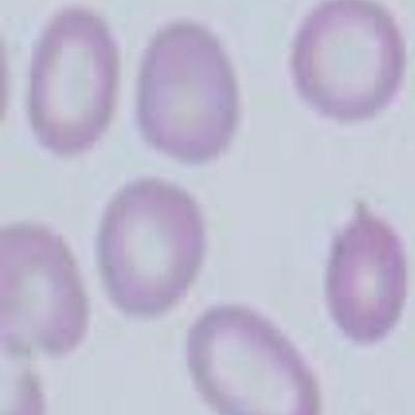

/content/fragments/fragment1265_0.jpg


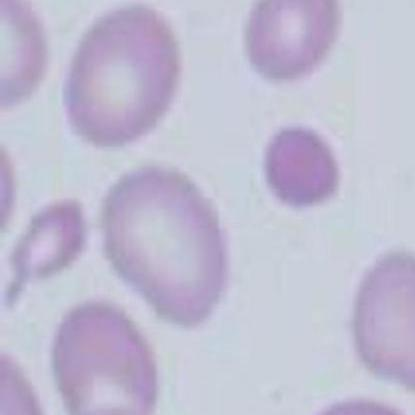

/content/fragments/fragment1771_0.jpg


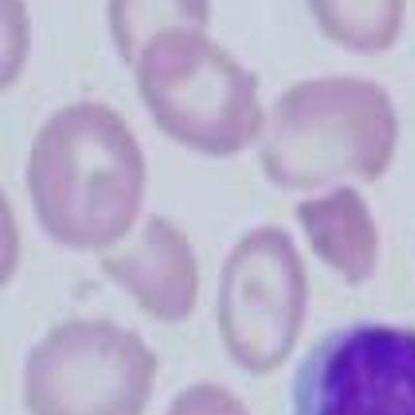

/content/fragments/fragment506_0.jpg


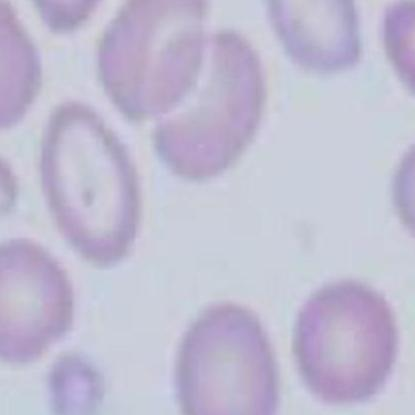

/content/fragments/fragment1012_1771.jpg


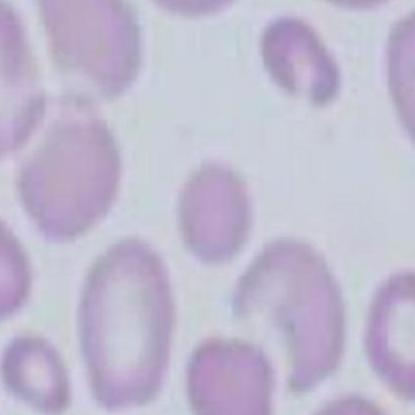

/content/fragments/fragment506_1518.jpg


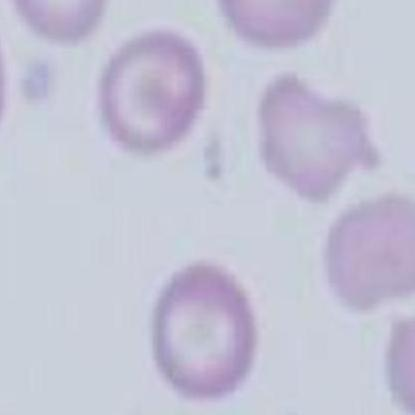

/content/fragments/fragment1265_1265.jpg


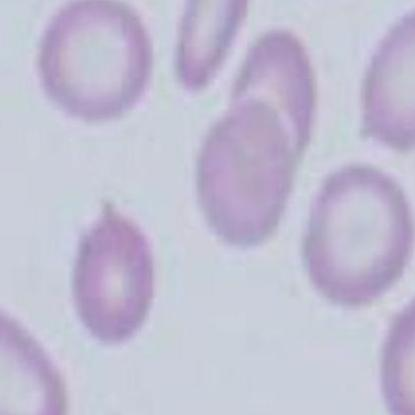

/content/fragments/fragment1265_253.jpg


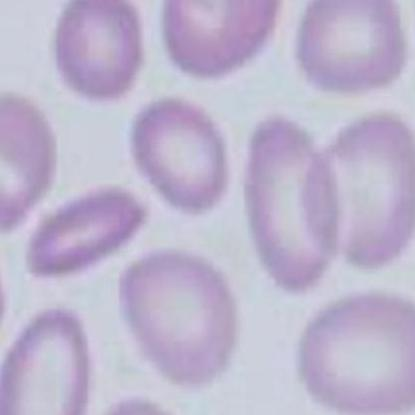

/content/fragments/fragment253_506.jpg


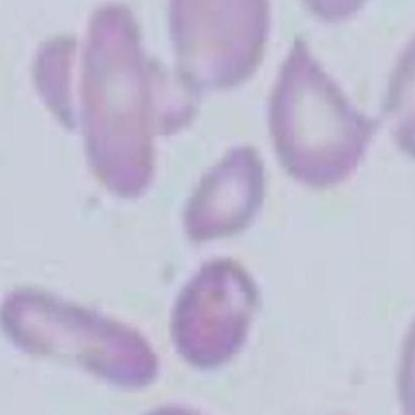

/content/fragments/fragment1771_1518.jpg


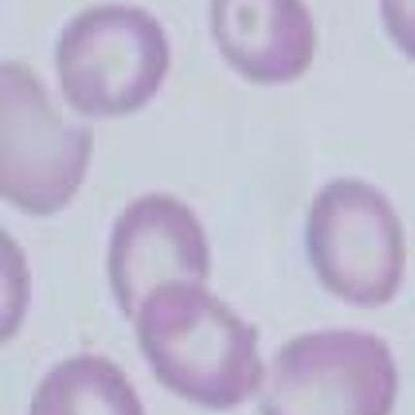

/content/fragments/fragment253_0.jpg


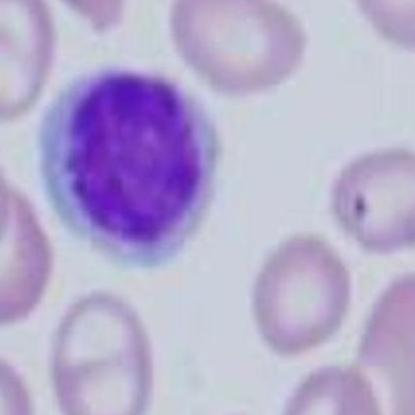

/content/fragments/fragment759_253.jpg


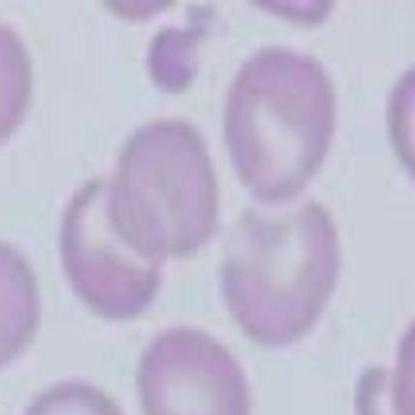

/content/fragments/fragment0_1771.jpg


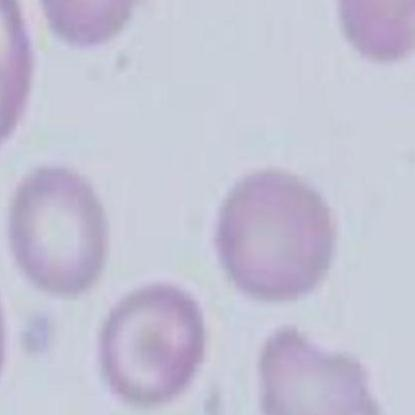

/content/fragments/fragment1012_1265.jpg


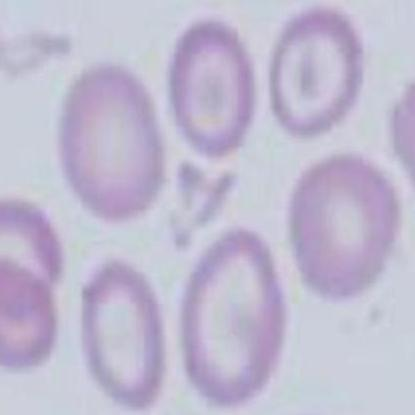

/content/fragments/fragment759_1012.jpg


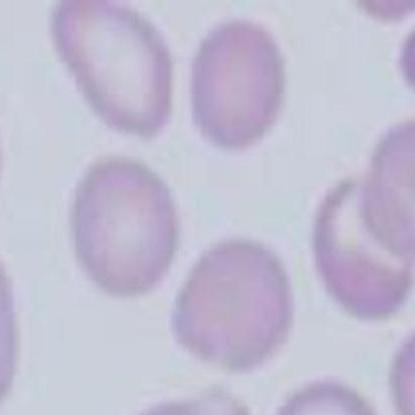

/content/fragments/fragment0_1518.jpg


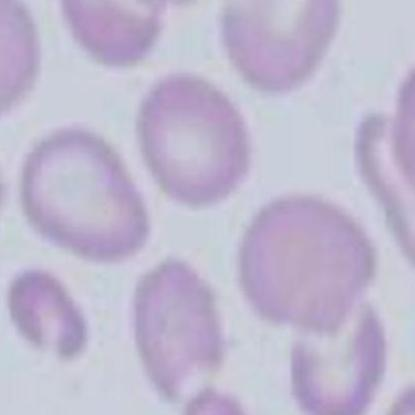

/content/fragments/fragment253_1771.jpg


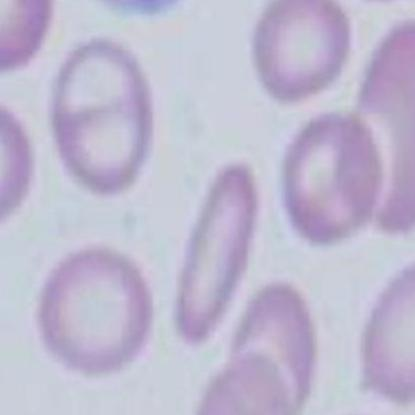

/content/fragments/fragment1012_253.jpg


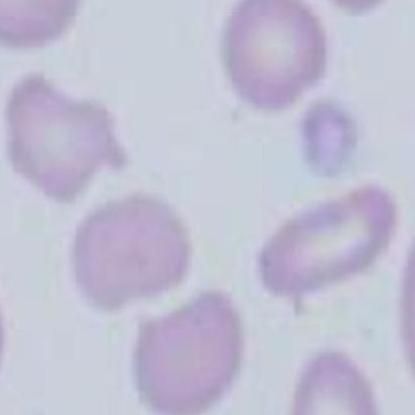

/content/fragments/fragment1265_1518.jpg


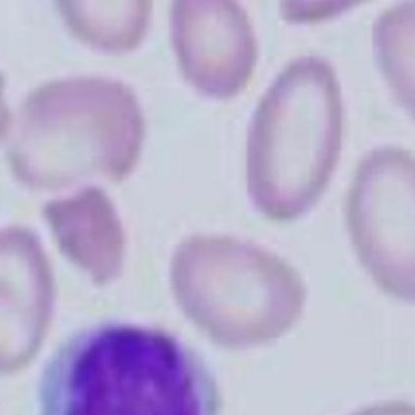

/content/fragments/fragment506_253.jpg


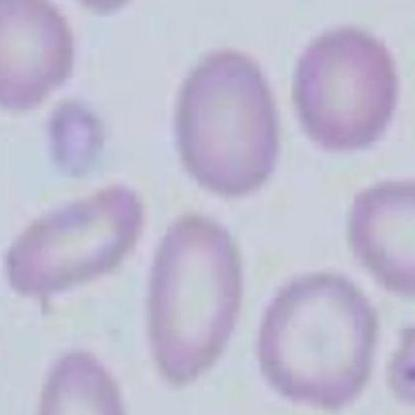

/content/fragments/fragment1265_1771.jpg


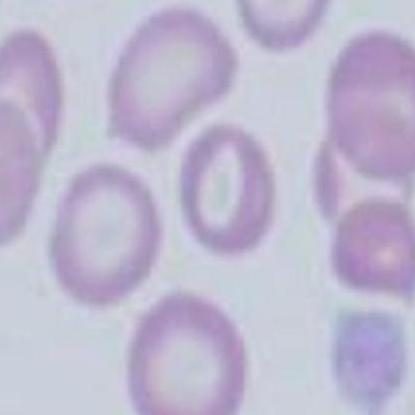

/content/fragments/fragment1265_506.jpg


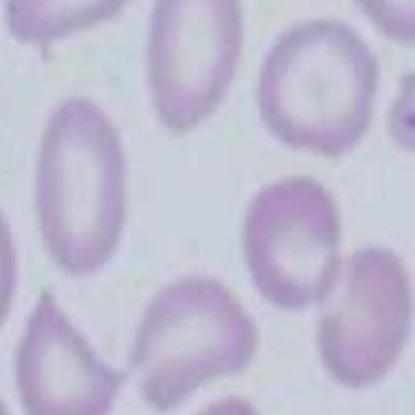

/content/fragments/fragment1518_1771.jpg


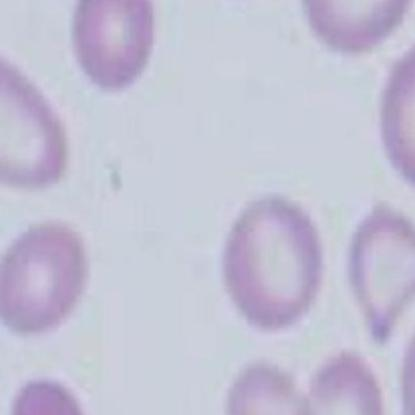

/content/fragments/fragment1518_253.jpg


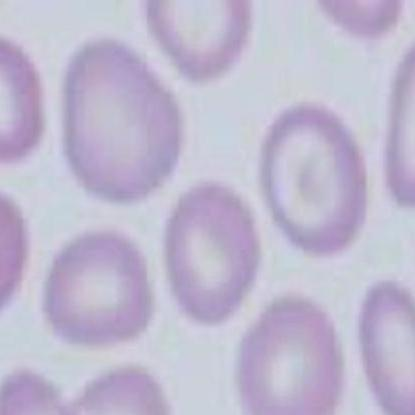

/content/fragments/fragment0_759.jpg


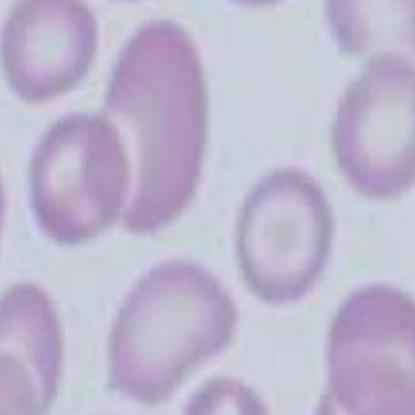

/content/fragments/fragment1012_506.jpg


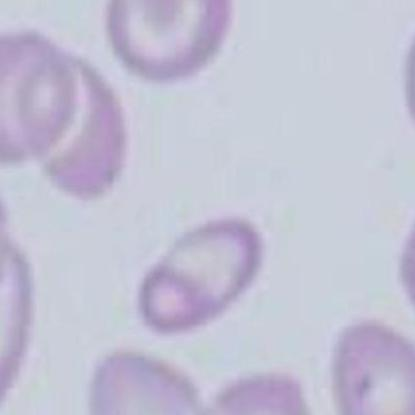

/content/fragments/fragment1518_1012.jpg


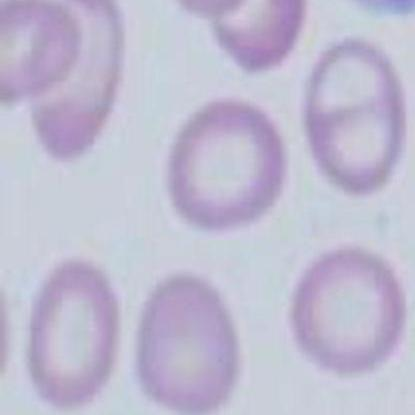

/content/fragments/fragment1012_0.jpg


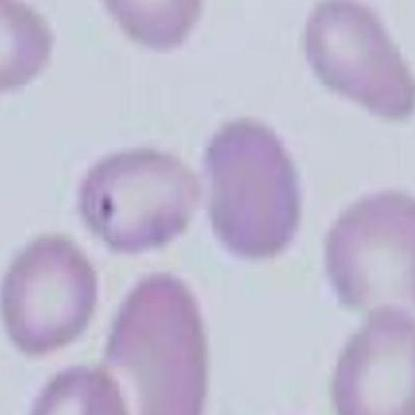

/content/fragments/fragment759_506.jpg


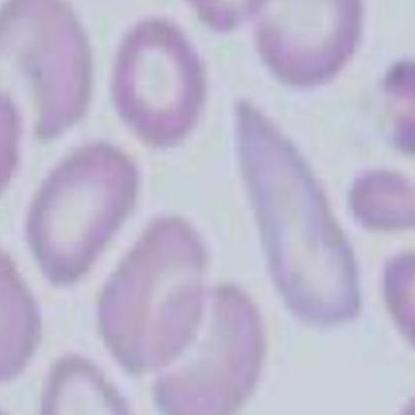

/content/fragments/fragment759_1771.jpg


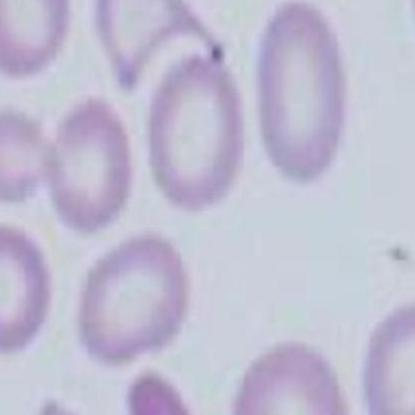

/content/fragments/fragment1771_506.jpg


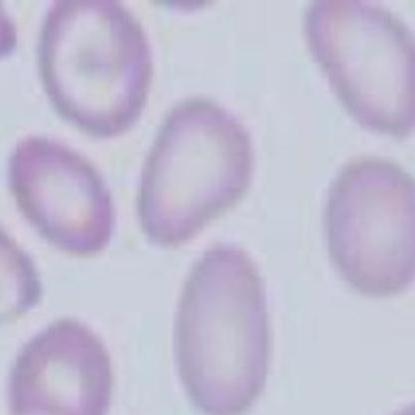

/content/fragments/fragment0_1265.jpg


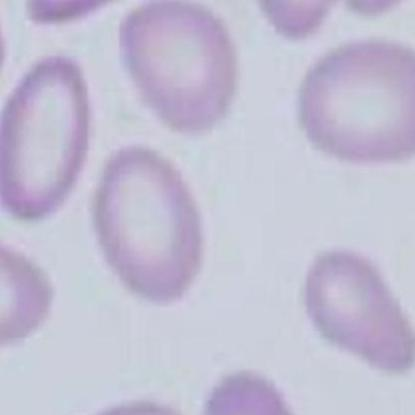

/content/fragments/fragment506_506.jpg


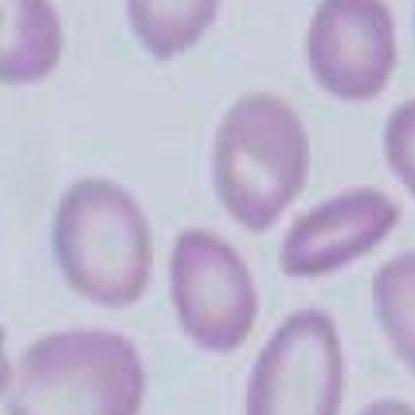

/content/fragments/fragment253_253.jpg


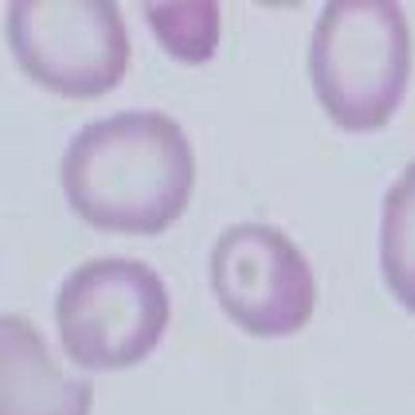

/content/fragments/fragment0_0.jpg


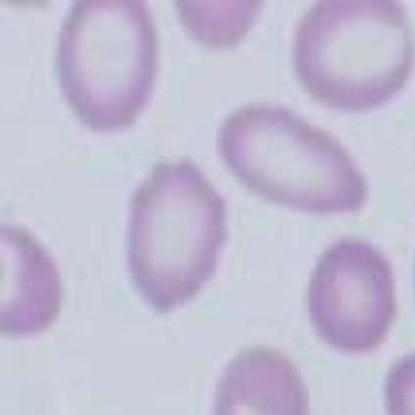

/content/fragments/fragment0_253.jpg


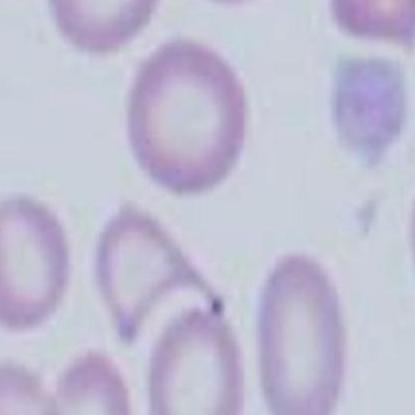

/content/fragments/fragment1518_506.jpg


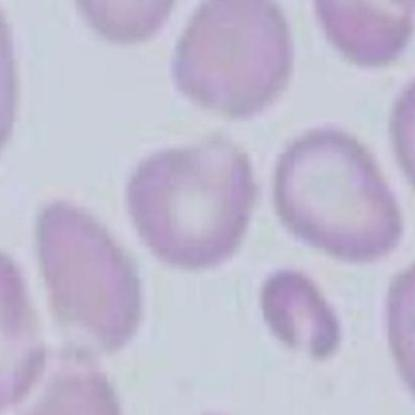

/content/fragments/fragment253_1518.jpg


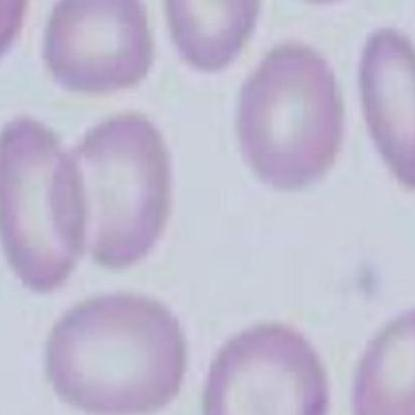

/content/fragments/fragment253_759.jpg


In [ ]:

import glob
from IPython.display import display, Image

for image_path in glob.glob(f"/content/fragments/fragment*.jpg"):
  display(Image(filename=image_path, width=416))
  print(image_path)

In [ ]:
%cp /content/fragments/* /content/gdrive/My\ Drive/fragments

### Import fragments from Google Drive

In [ ]:
import os.path
from os import path

if path.exists('/content/fragments/') == False:
  os.mkdir('/content/fragments/')

os.chdir('/content/fragments/')
!pwd
!ls

/content/fragments
fragment0_0.jpg        fragment1265_1012.jpg  fragment1771_1265.jpg  fragment506_1518.jpg
fragment0_1012.jpg     fragment1265_1265.jpg  fragment1771_1518.jpg  fragment506_1771.jpg
fragment0_1265.jpg     fragment1265_1518.jpg  fragment1771_1771.jpg  fragment506_253.jpg
fragment0_1518.jpg     fragment1265_1771.jpg  fragment1771_253.jpg   fragment506_506.jpg
fragment0_1771.jpg     fragment1265_253.jpg   fragment1771_506.jpg   fragment506_759.jpg
fragment0_253.jpg      fragment1265_506.jpg   fragment1771_759.jpg   fragment759_0.jpg
fragment0_506.jpg      fragment1265_759.jpg   fragment253_0.jpg      fragment759_1012.jpg
fragment0_759.jpg      fragment1518_0.jpg     fragment253_1012.jpg   fragment759_1265.jpg
fragment1012_0.jpg     fragment1518_1012.jpg  fragment253_1265.jpg   fragment759_1518.jpg
fragment1012_1012.jpg  fragment1518_1265.jpg  fragment253_1518.jpg   fragment759_1771.jpg
fragment1012_1265.jpg  fragment1518_1518.jpg  fragment253_1771.jpg   fragment759_253.jp

In [ ]:
# Copy weights from our Google Drive to a folder called "weights" in our YOLO5 directory.
%cp /content/gdrive/My\ Drive/fragments/* /content/fragments

In [ ]:
model = YOLO("/content/yolov8/weights/best.pt")
results = model.predict(source=f"/content/fragments/fragment*.jpg", show=True, imgsz=416, save=True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/64 /content/fragments/fragment0_0.jpg: 416x416 7 RBCs, 121.0ms
image 2/64 /content/fragments/fragment0_1012.jpg: 416x416 11 RBCs, 84.7ms
image 3/64 /content/fragments/fragment0_1265.jpg: 416x416 9 RBCs, 84.6ms
image 4/64 /content/fragments/fragment0_1518.jpg: 416x416 6 RBCs, 2 WBCs, 88.2ms
image 5/64 /content/fragments/fragment0_1771.jpg: 416x416 8 RBCs, 1 WBC, 83.7ms
image 6/64 /content/fragments/fragment0_253.jpg: 416x416 9 RBCs, 85.7ms
image 7/64 /content/fragments/fragment0_506.jpg: 416x416 9 RBCs, 3 WBCs, 84.3ms
image 8/64 /content/fragments/fragment0_759.jpg: 416x416 10 RBCs, 2 WBCs, 85.8ms
image 9/64 /content/fragments/fragment1012_0.jpg: 416x416 7 RBCs, 1 WBC, 84.1ms
image 10/64 /content/fragments/fragment1012_1012.jpg: 416x416 10 RBCs, 102.9ms
image 11/64 /content/fragments/fragment1012_1265.jpg: 416x416 5 RBCs, 1 WBC, 87.5ms
image 12/64 /content/fragments/fragment1012_1518.jpg: 416x416 8 RBCs, 

/content/fragments/runs/detect/predict6/fragment1518_1771.jpg


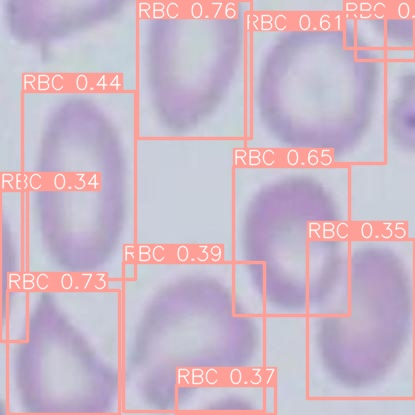


/content/fragments/runs/detect/predict6/fragment1265_1265.jpg


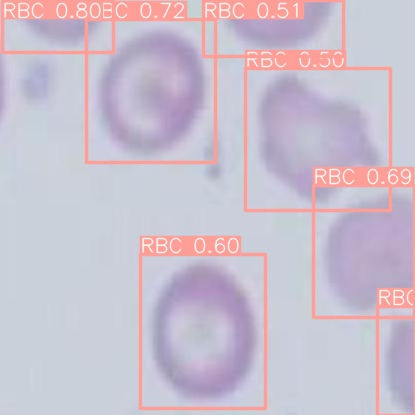


/content/fragments/runs/detect/predict6/fragment1012_0.jpg


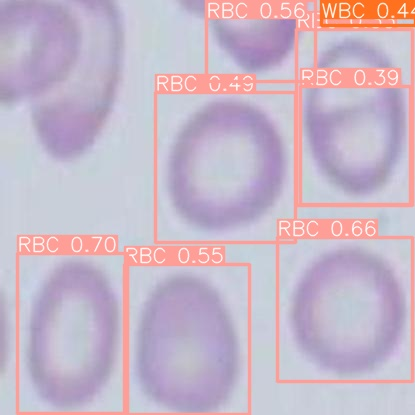


/content/fragments/runs/detect/predict6/fragment1518_506.jpg


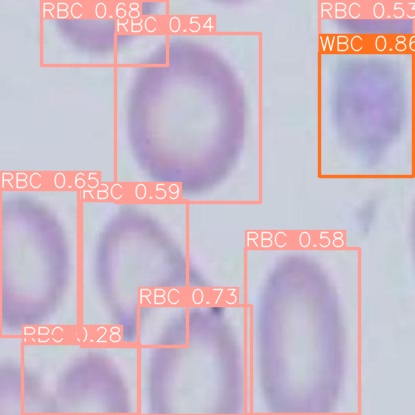


/content/fragments/runs/detect/predict6/fragment1518_1518.jpg


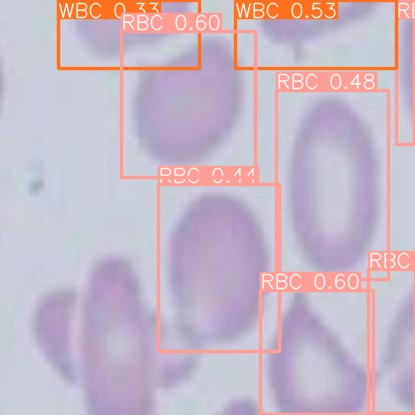


/content/fragments/runs/detect/predict6/fragment1771_759.jpg


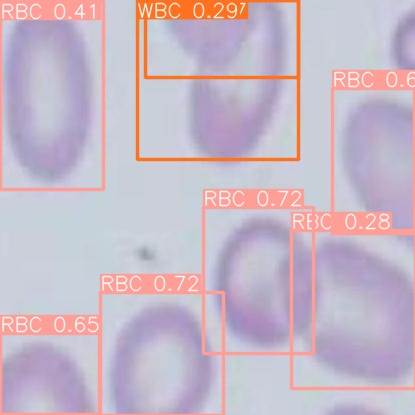


/content/fragments/runs/detect/predict6/fragment1012_506.jpg


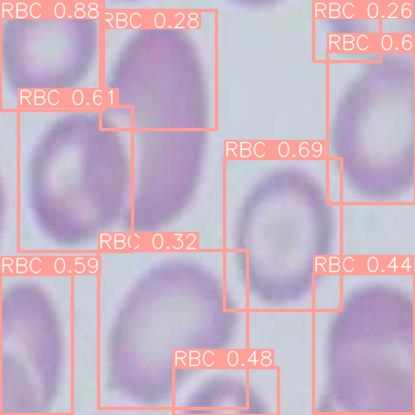


/content/fragments/runs/detect/predict6/fragment1265_0.jpg


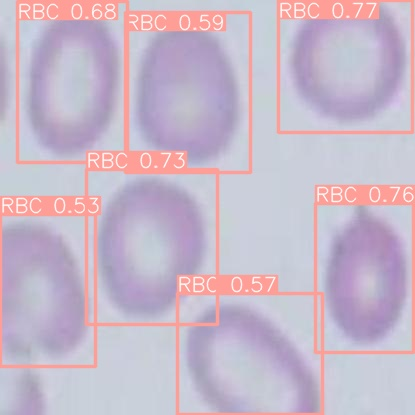


/content/fragments/runs/detect/predict6/fragment759_0.jpg


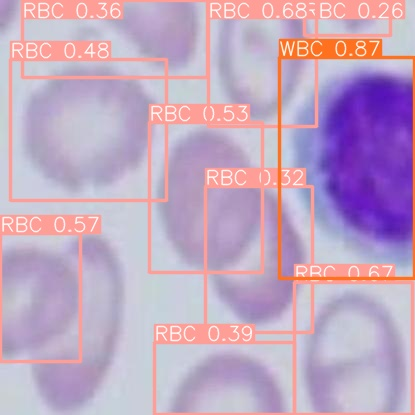


/content/fragments/runs/detect/predict6/fragment0_1265.jpg


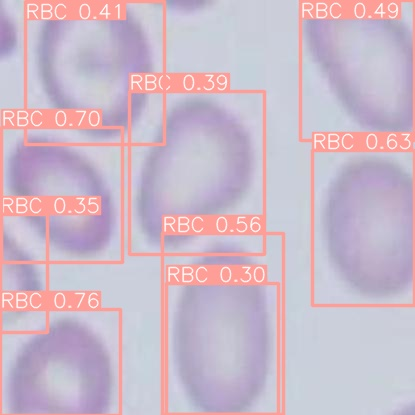


/content/fragments/runs/detect/predict6/fragment1771_506.jpg


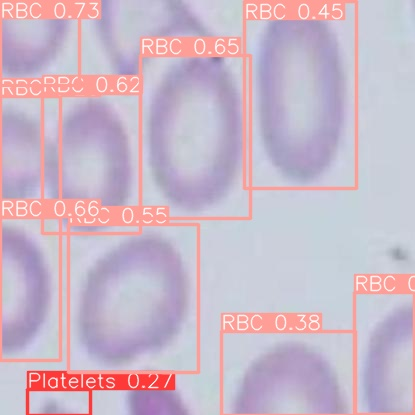


/content/fragments/runs/detect/predict6/fragment759_1012.jpg


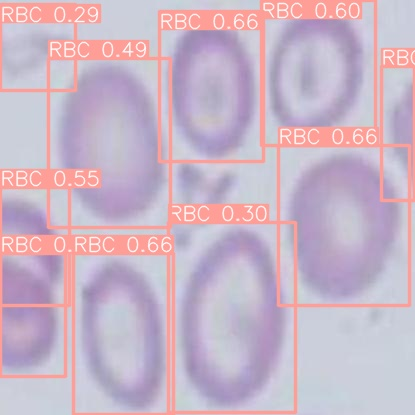


/content/fragments/runs/detect/predict6/fragment759_759.jpg


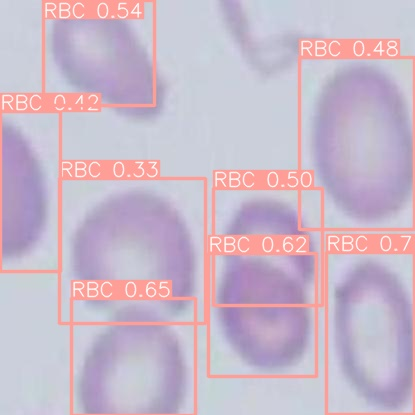


/content/fragments/runs/detect/predict6/fragment253_759.jpg


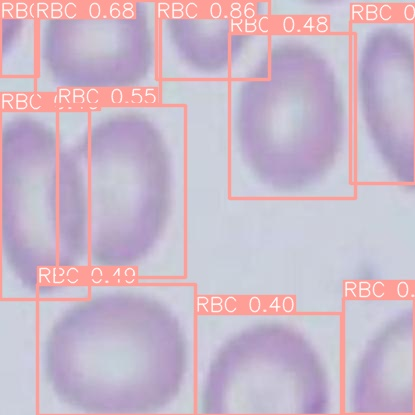


/content/fragments/runs/detect/predict6/fragment1771_0.jpg


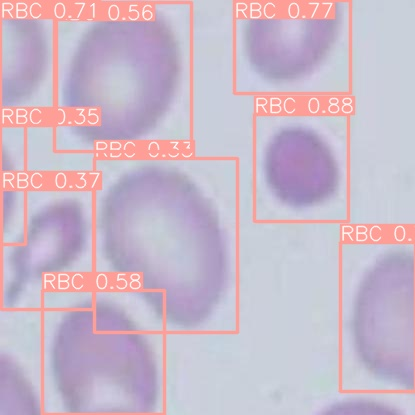


/content/fragments/runs/detect/predict6/fragment759_253.jpg


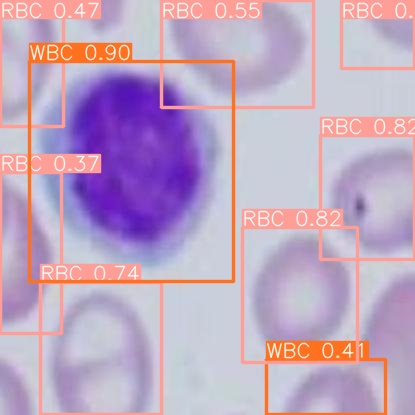


/content/fragments/runs/detect/predict6/fragment1265_759.jpg


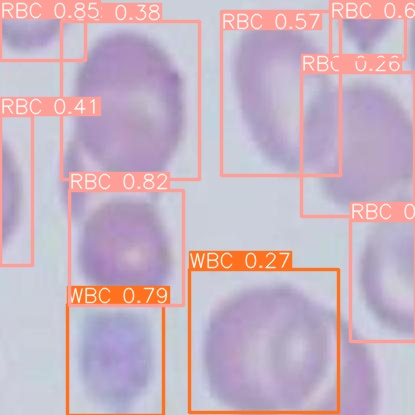


/content/fragments/runs/detect/predict6/fragment1012_1265.jpg


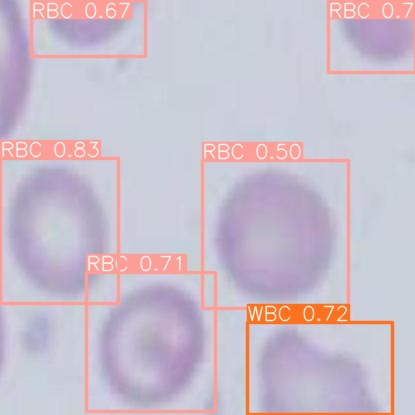


/content/fragments/runs/detect/predict6/fragment1518_759.jpg


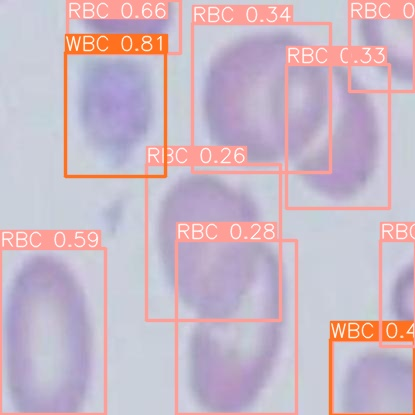


/content/fragments/runs/detect/predict6/fragment506_1771.jpg


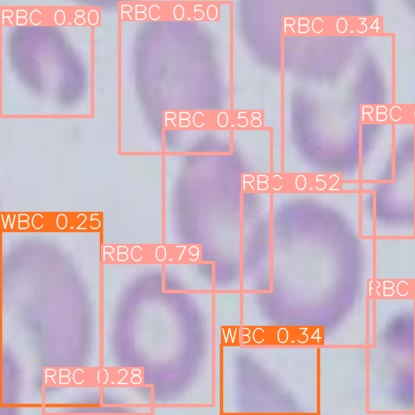


/content/fragments/runs/detect/predict6/fragment506_759.jpg


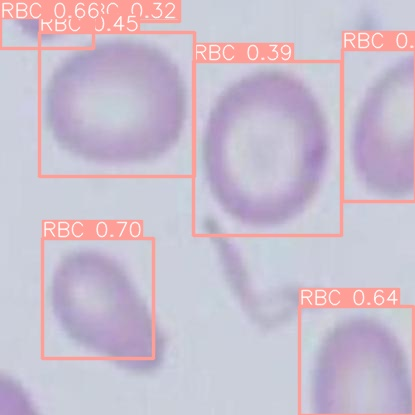


/content/fragments/runs/detect/predict6/fragment253_1265.jpg


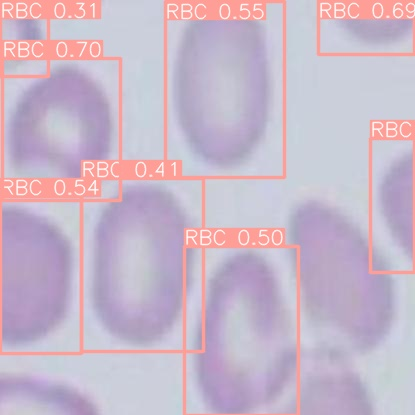


/content/fragments/runs/detect/predict6/fragment1265_506.jpg


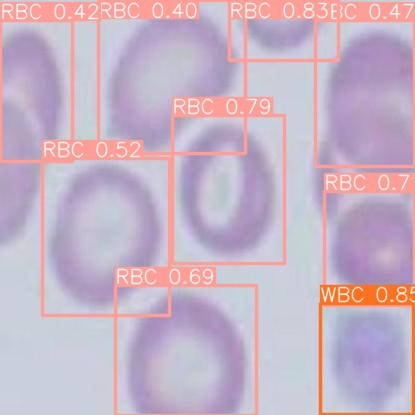


/content/fragments/runs/detect/predict6/fragment1265_1518.jpg


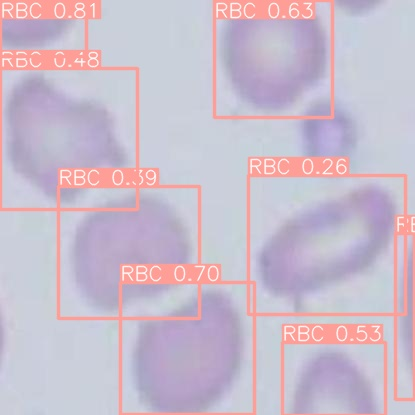


/content/fragments/runs/detect/predict6/fragment0_759.jpg


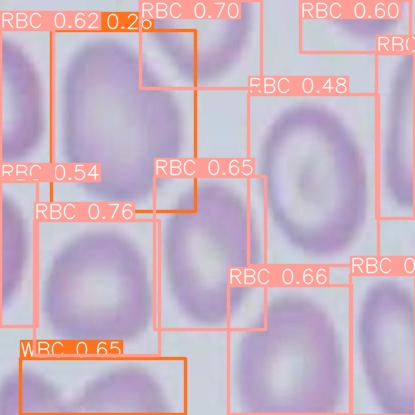


/content/fragments/runs/detect/predict6/fragment506_1265.jpg


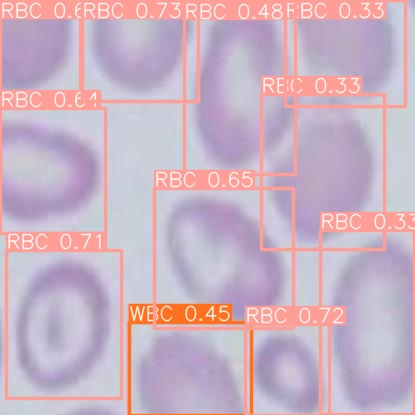


/content/fragments/runs/detect/predict6/fragment506_1518.jpg


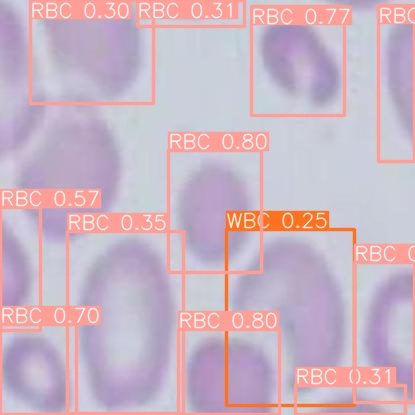


/content/fragments/runs/detect/predict6/fragment253_506.jpg


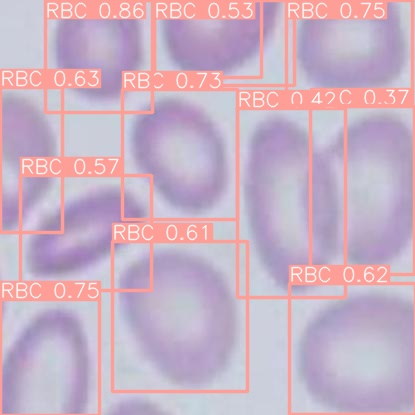


/content/fragments/runs/detect/predict6/fragment1012_1012.jpg


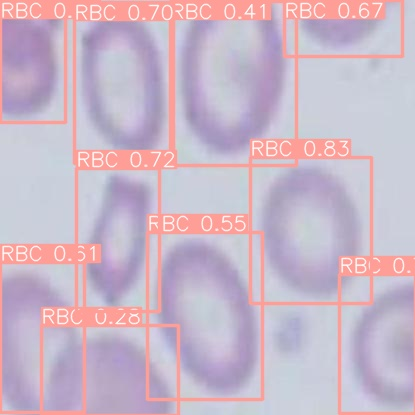


/content/fragments/runs/detect/predict6/fragment253_253.jpg


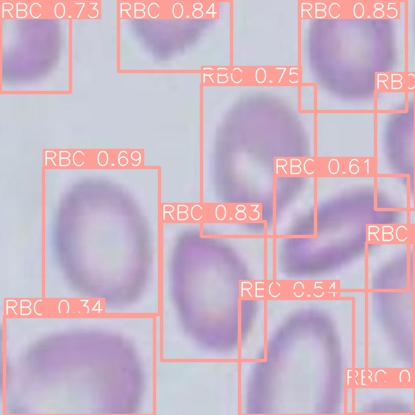


/content/fragments/runs/detect/predict6/fragment253_1012.jpg


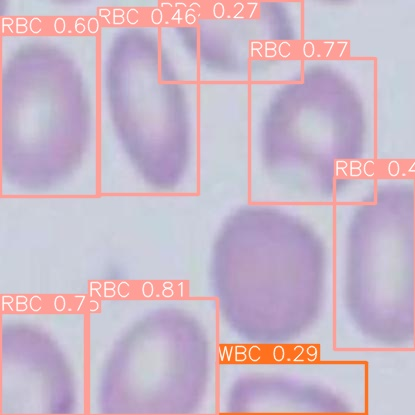


/content/fragments/runs/detect/predict6/fragment1265_1012.jpg


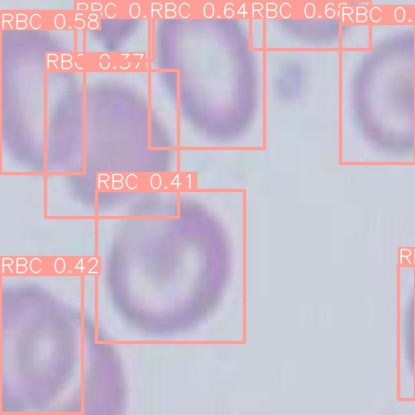


/content/fragments/runs/detect/predict6/fragment1771_253.jpg


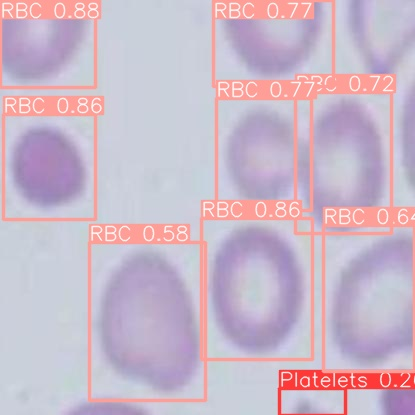


/content/fragments/runs/detect/predict6/fragment1518_1265.jpg


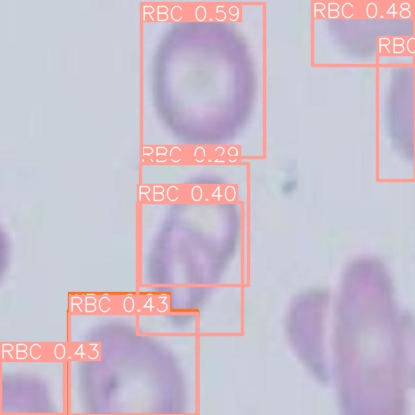


/content/fragments/runs/detect/predict6/fragment0_253.jpg


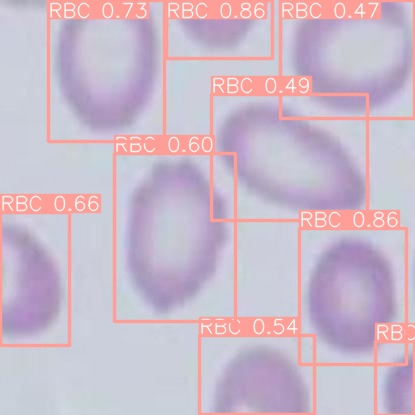


/content/fragments/runs/detect/predict6/fragment506_506.jpg


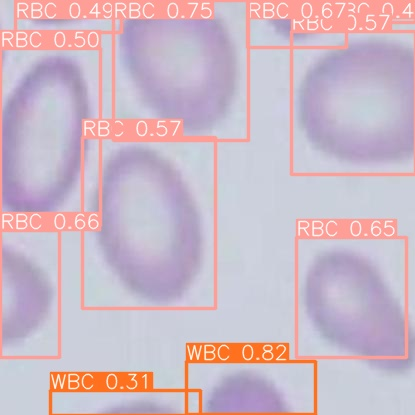


/content/fragments/runs/detect/predict6/fragment1265_1771.jpg


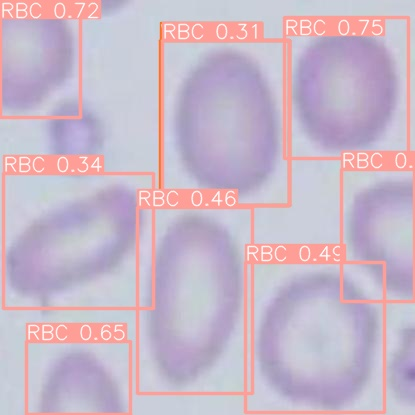


/content/fragments/runs/detect/predict6/fragment0_0.jpg


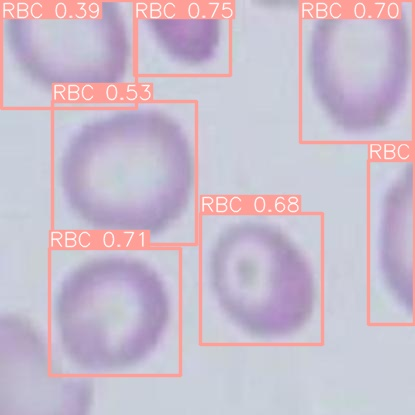


/content/fragments/runs/detect/predict6/fragment1771_1265.jpg


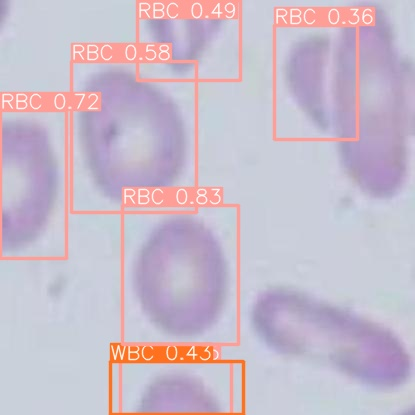


/content/fragments/runs/detect/predict6/fragment1518_253.jpg


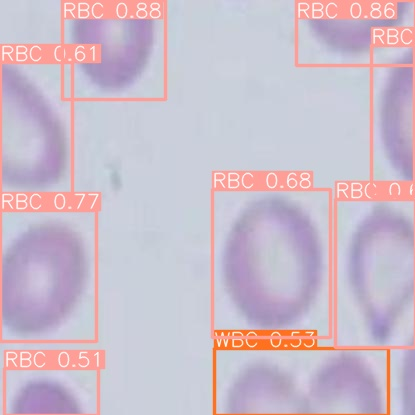


/content/fragments/runs/detect/predict6/fragment1518_0.jpg


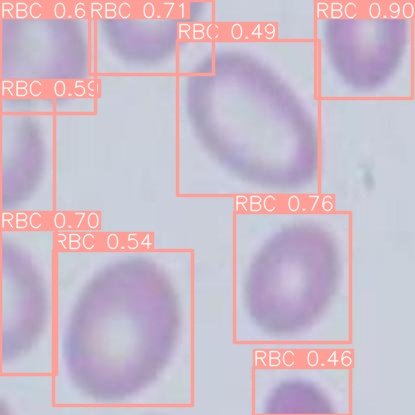


/content/fragments/runs/detect/predict6/fragment1012_253.jpg


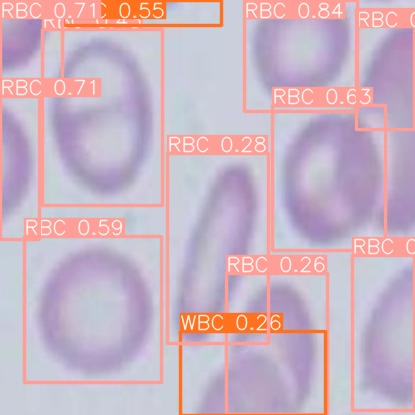


/content/fragments/runs/detect/predict6/fragment1012_1771.jpg


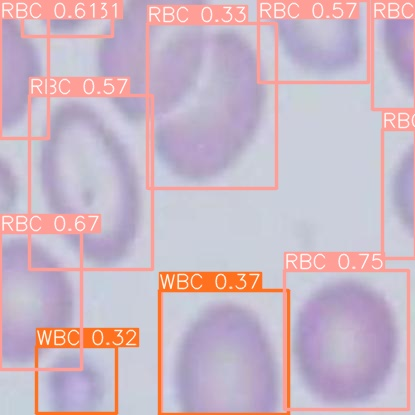


/content/fragments/runs/detect/predict6/fragment506_1012.jpg


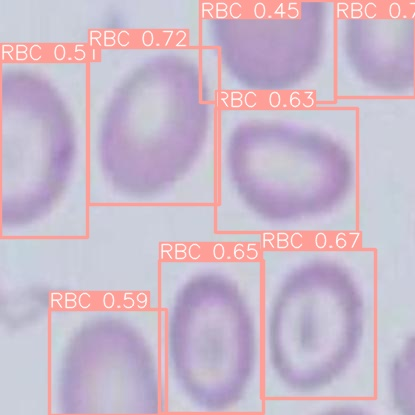


/content/fragments/runs/detect/predict6/fragment1771_1518.jpg


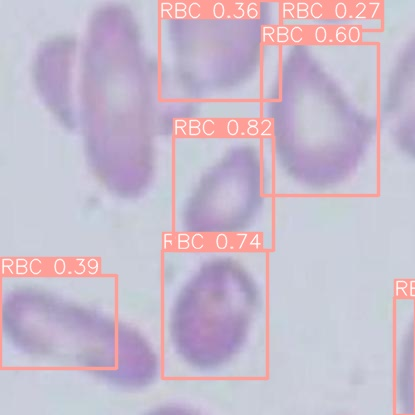


/content/fragments/runs/detect/predict6/fragment253_0.jpg


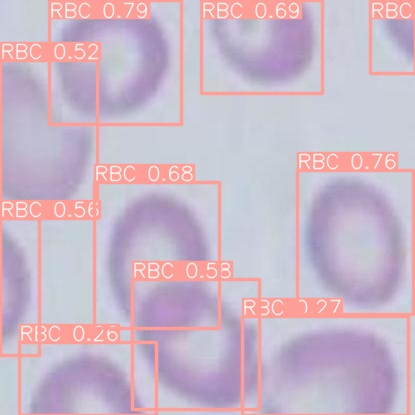


/content/fragments/runs/detect/predict6/fragment1771_1771.jpg


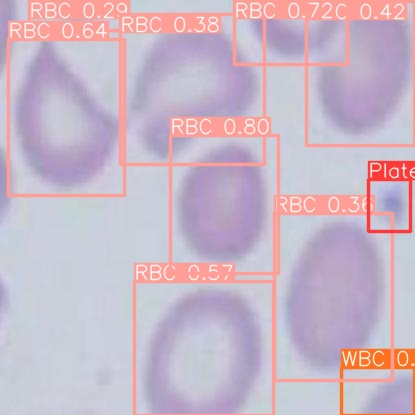


/content/fragments/runs/detect/predict6/fragment253_1518.jpg


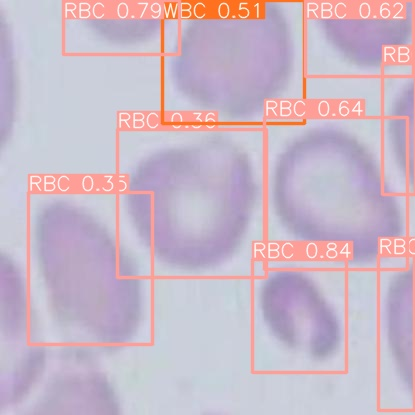


/content/fragments/runs/detect/predict6/fragment0_1518.jpg


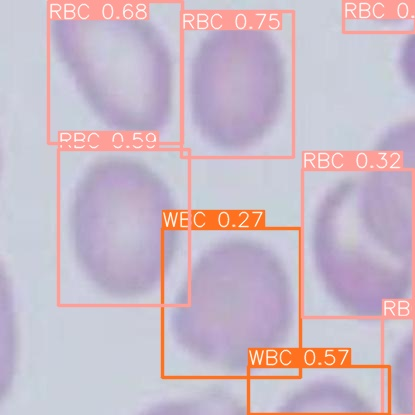


/content/fragments/runs/detect/predict6/fragment253_1771.jpg


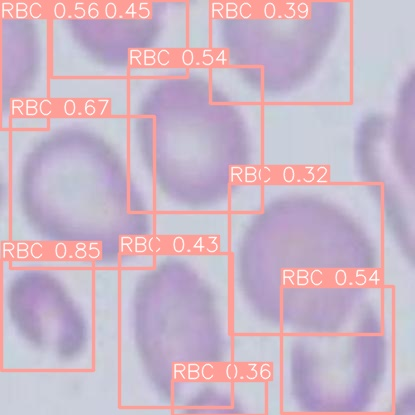


/content/fragments/runs/detect/predict6/fragment1265_253.jpg


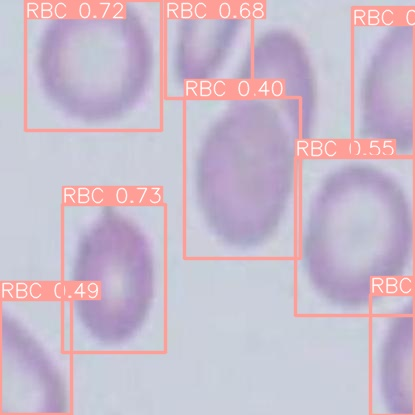


/content/fragments/runs/detect/predict6/fragment0_1012.jpg


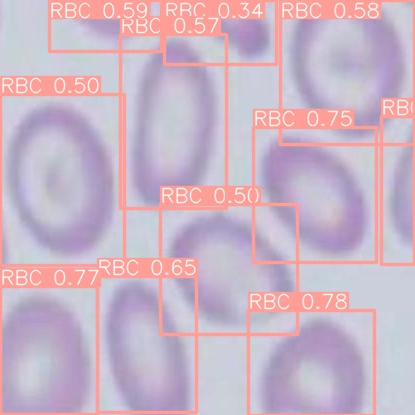


/content/fragments/runs/detect/predict6/fragment1012_1518.jpg


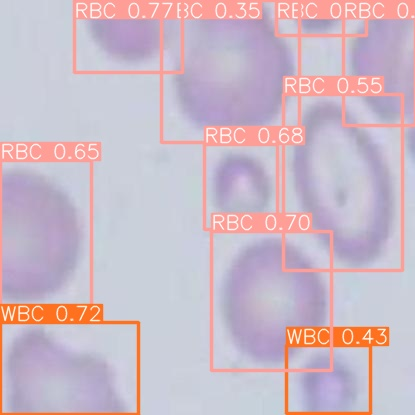


/content/fragments/runs/detect/predict6/fragment506_253.jpg


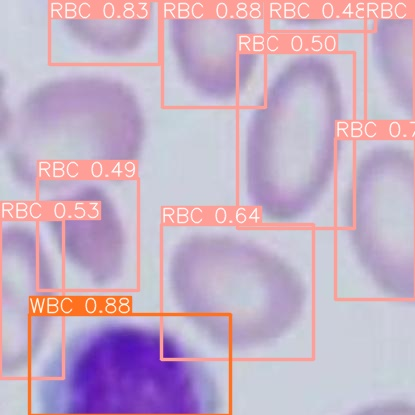


/content/fragments/runs/detect/predict6/fragment1518_1012.jpg


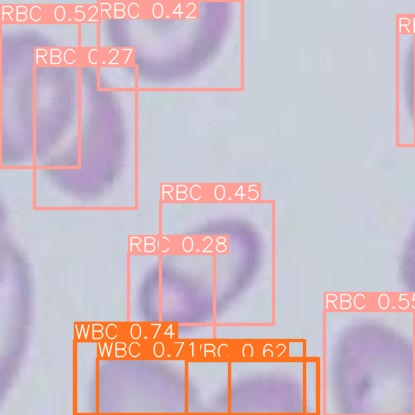


/content/fragments/runs/detect/predict6/fragment759_1771.jpg


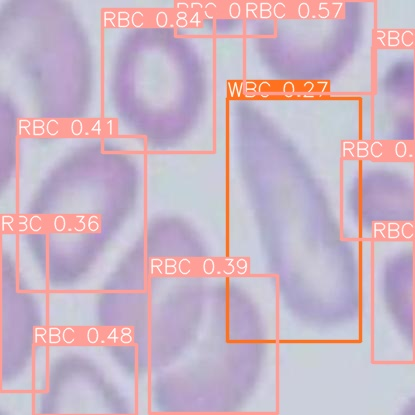


/content/fragments/runs/detect/predict6/fragment0_1771.jpg


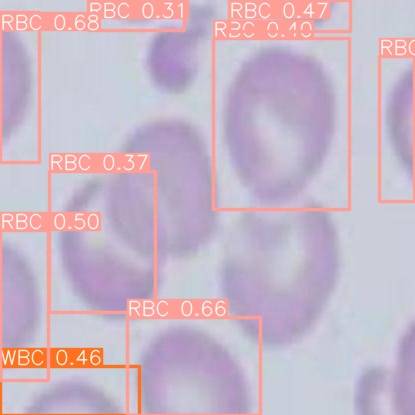


/content/fragments/runs/detect/predict6/fragment1012_759.jpg


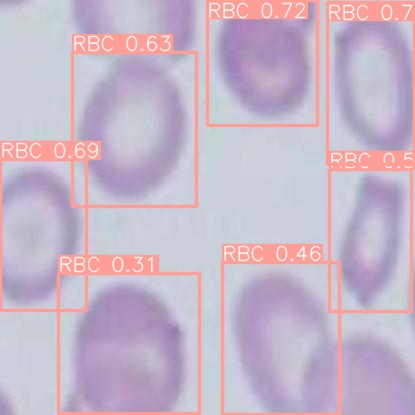


/content/fragments/runs/detect/predict6/fragment759_1265.jpg


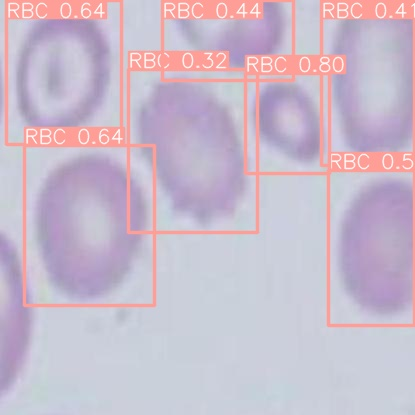


/content/fragments/runs/detect/predict6/fragment759_506.jpg


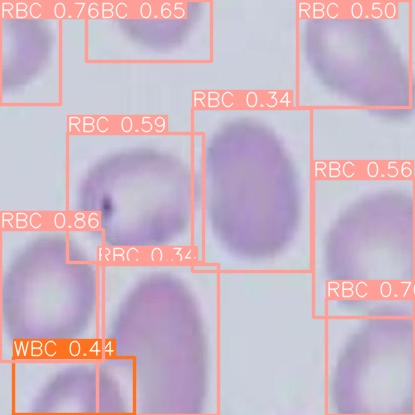


/content/fragments/runs/detect/predict6/fragment1771_1012.jpg


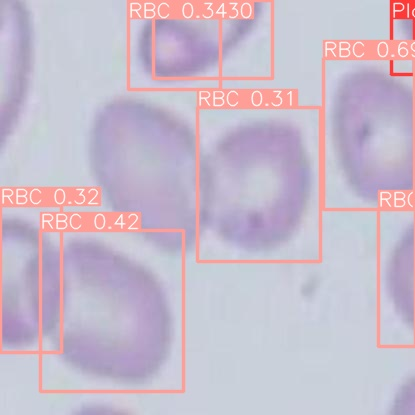


/content/fragments/runs/detect/predict6/fragment759_1518.jpg


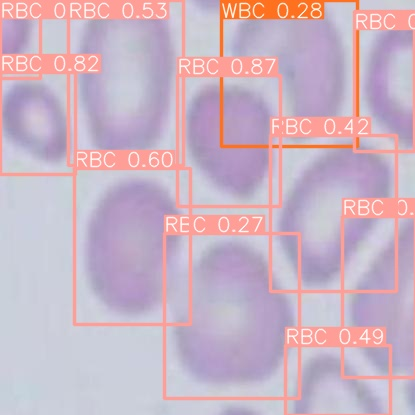


/content/fragments/runs/detect/predict6/fragment506_0.jpg


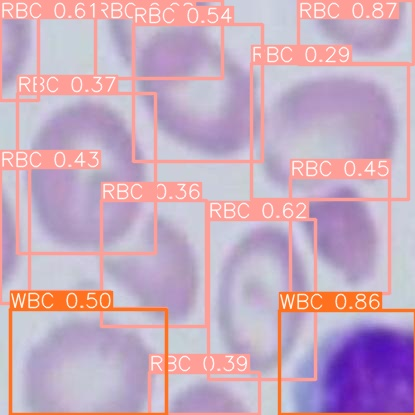


/content/fragments/runs/detect/predict6/fragment0_506.jpg


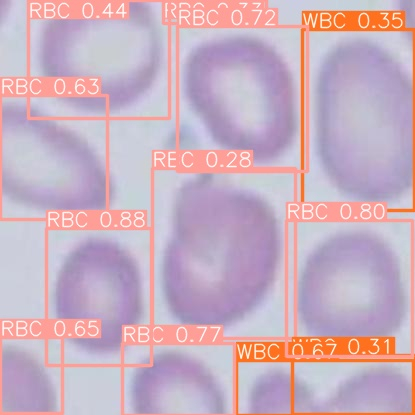

In [ ]:
import glob
from IPython.display import display, Image

for image_path in glob.glob(f"/content/fragments/runs/detect/predict6/*.jpg"):
  print(image_path)
  display(Image(filename=image_path, width=600))
  print()

### Export output images to Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cp /content/fragments/runs/detect/predict6/* /content/gdrive/My\ Drive/

### Save absolute coordinates of boxes to DataFrame

In [ ]:
import numpy as np

In [ ]:
len_of_boxes = []
for i in range(len(results)):
  len_of_boxes += [max((box.xywh[0][2]).cpu(), (box.xywh[0][3]).cpu()) for box in results[i].boxes]
  # print( f"max в {i}: {len_of_box} ")
AVG_LEN_OF_BOX = np.mean(len_of_boxes)
MIN_LEN_OF_BOXES = np.min(len_of_boxes)
MAX_LEN_OF_BOXES = np.max(len_of_boxes)

print('AVG_LEN_OF_BOX: ', AVG_LEN_OF_BOX)
print('MIN_LEN_OF_BOXES: ', MIN_LEN_OF_BOXES)
print('MAX_LEN_OF_BOXES: ', MAX_LEN_OF_BOXES)

135.27153825759888

In [ ]:
data = []
for y in range(0, new_size - 415, 416 - shift):
  for x in range(0, new_size - 415, 416 - shift):
    results = model.predict(source=f"/content/fragments/fragment{y}_{x}.jpg", show=False, imgsz=416, save_txt=True)
    data += [{ \
        'box_left': round((x + box.xyxy[0][0]).cpu().item()), \
        'box_top': round((y + box.xyxy[0][1]).cpu().item()), \
        'cls_name': model.names[int(box.cls)],\
        'in_shift_area': True if box.xyxy[0][0] >= 416 - shift else False, \
        'duplicated': False \
        } for box in results[0].boxes]


image 1/1 /content/fragments/fragment0_0.jpg: 416x416 7 RBCs, 14.1ms
Speed: 2.9ms preprocess, 14.1ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict
64 labels saved to runs/detect/predict/labels

image 1/1 /content/fragments/fragment0_253.jpg: 416x416 9 RBCs, 15.7ms
Speed: 1.8ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict
64 labels saved to runs/detect/predict/labels

image 1/1 /content/fragments/fragment0_506.jpg: 416x416 9 RBCs, 3 WBCs, 10.9ms
Speed: 6.2ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict
64 labels saved to runs/detect/predict/labels

image 1/1 /content/fragments/fragment0_759.jpg: 416x416 10 RBCs, 2 WBCs, 6.6ms
Speed: 1.3ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict
64 labels saved to runs/d

### Add data to DataFrame

In [ ]:
# Importing Pandas to create DataFrame
import pandas as pd


# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['box_left', 'box_top', 'cls_name', 'in_shift_area', 'duplicated'])
df = df.sort_values(by=['box_left', 'box_top'])
df

### Export df to Google Drive


In [ ]:
df.to_csv('/content/out.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
%cp /content/out.csv /content/gdrive/My\ Drive/

### Import df from Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cp /content/gdrive/MyDrive/out.csv /content/out.csv

In [ ]:
import pandas as pd
df = pd.read_csv('/content/out.csv')

In [ ]:
df = df.sort_values(by=['box_left', 'box_top'])
df['duplicated'] = False
df

box_left      box_top cls_name  in_shift_area  duplicated
159     0.000000   506.000000      RBC          False       False
163     0.000000   674.800659      RBC          False       False
244     0.000000   992.855957      RBC          False       False
538     0.000000  1771.000000      RBC          False       False
542     0.000000  1896.820312      RBC          False       False
..           ...          ...      ...            ...         ...
314  2143.105469   806.930664      RBC           True       False
385  2143.106934  1012.000000      RBC           True       False
307  2143.187500   998.269409      RBC           True       False
70   2150.806641    56.731647      RBC           True       False
387  2153.220947  1141.360718      RBC           True       False

[603 rows x 5 columns]

### Count duplicated cells in shift area

In [ ]:
df[ (df['cls_name'] == 'RBC')]

box_left      box_top cls_name  in_shift_area  duplicated
159     0.000000   506.000000      RBC          False       False
163     0.000000   674.800659      RBC          False       False
244     0.000000   992.855957      RBC          False       False
538     0.000000  1771.000000      RBC          False       False
542     0.000000  1896.820312      RBC          False       False
..           ...          ...      ...            ...         ...
314  2143.105469   806.930664      RBC           True       False
385  2143.106934  1012.000000      RBC           True       False
307  2143.187500   998.269409      RBC           True       False
70   2150.806641    56.731647      RBC           True       False
387  2153.220947  1141.360718      RBC           True       False

[547 rows x 5 columns]

In [ ]:
def dist(x1, y1, x2, y2):
  return (x2 - x1)**2 + (y2-y1)**2

In [ ]:
df.loc[:, ['box_left', 'box_top']]

box_left      box_top
159     0.000000   506.000000
163     0.000000   674.800659
244     0.000000   992.855957
538     0.000000  1771.000000
542     0.000000  1896.820312
..           ...          ...
314  2143.105469   806.930664
385  2143.106934  1012.000000
307  2143.187500   998.269409
70   2150.806641    56.731647
387  2153.220947  1141.360718

[603 rows x 2 columns]

In [ ]:
# new_df =  df[['box_left', 'box_top']][ (df['in_shift_area'] == True) & (df['cls_name'] == 'RBC') ]
new_df =  df[['box_left', 'box_top']][ (df['in_shift_area'] == True)]

In [ ]:
new_df

box_left      box_top  duplicated
467   253.450790  1885.936157       False
535   254.057098  1885.305420       False
318   277.725189  1249.322266       False
392   278.216919  1265.597046       False
241   279.001587   816.999023       False
..           ...          ...         ...
314  2143.105469   806.930664       False
385  2143.106934  1012.000000       False
307  2143.187500   998.269409       False
70   2150.806641    56.731647       False
387  2153.220947  1141.360718       False

[169 rows x 3 columns]

In [ ]:
378/64


5.90625

In [ ]:
new_df['duplicated'] = False
new_df

box_left      box_top  duplicated
467   253.450790  1885.936157       False
535   254.057098  1885.305420       False
318   277.725189  1249.322266       False
392   278.216919  1265.597046       False
241   279.001587   816.999023       False
..           ...          ...         ...
314  2143.105469   806.930664       False
385  2143.106934  1012.000000       False
307  2143.187500   998.269409       False
70   2150.806641    56.731647       False
387  2153.220947  1141.360718       False

[169 rows x 3 columns]

In [ ]:
new_df.iloc[0]['box_top']

1885.9361572265625

In [ ]:
MIN_BOX_LEN = 16

In [ ]:

# Create the pandas DataFrame
duplicted_cells_df = pd.DataFrame()

In [ ]:
count = 0
for i in range(len(new_df) - 1):
  # print(dist(new_df.iloc[i]['box_left'], new_df.iloc[i]['box_top'], new_df.iloc[i+1]['box_left'], new_df.iloc[i+1]['box_top']))
  if dist(new_df.iloc[i]['box_left'], new_df.iloc[i]['box_top'], new_df.iloc[i+1]['box_left'], new_df.iloc[i+1]['box_top']) < MIN_BOX_LEN**2:
    count += 2
count

62